In [2]:
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt

Load in the data from the classifier.ipynb

In [1]:
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot

data_dir = 'dogs/working/resized'
output_dir = 'dogs/output/skmodel_raw_top20'
train_path       = f"{data_dir}/train"
test_path       = f"{data_dir}/test"
h5_data_train          = f'{output_dir}/data_train.h5'
h5_labels_train        = f'{output_dir}/labels_train.h5'
h5_data_test          = f'{output_dir}/data_test.h5'
h5_labels_test        = f'{output_dir}/labels_test.h5'


# import the feature vector and trained labels
h5f_data_train  = h5py.File(h5_data_train, 'r')
h5f_label_train = h5py.File(h5_labels_train, 'r')

global_features_string_train = h5f_data_train['dataset_1']
global_labels_string_train   = h5f_label_train['dataset_1']

global_features_train = np.array(global_features_string_train)
global_labels_train   = np.array(global_labels_string_train)

h5f_data_train.close()
h5f_label_train.close()


# import the feature vector and trained labels
h5f_data_test  = h5py.File(h5_data_test, 'r')
h5f_label_test = h5py.File(h5_labels_test, 'r')

global_features_string_test = h5f_data_test['dataset_1']
global_labels_string_test   = h5f_label_test['dataset_1']

global_features_test = np.array(global_features_string_test)
global_labels_test   = np.array(global_labels_string_test)

h5f_data_test.close()
h5f_label_test.close()


# verify the shape of the feature vector and labels
print("[STATUS] train features shape: {}".format(global_features_train.shape))
print("[STATUS] train labels shape: {}".format(global_labels_train.shape))
print("[STATUS] test features shape: {}".format(global_features_test.shape))
print("[STATUS] test labels shape: {}".format(global_labels_test.shape))

print("[STATUS] training started...")



[STATUS] train features shape: (3417, 154587)
[STATUS] train labels shape: (3417,)
[STATUS] test features shape: (825, 154587)
[STATUS] test labels shape: (825,)
[STATUS] training started...


Reshape the data to get the shape of 227,227,3

In [2]:
img_3d_list_train = []
for img in global_features_train:
    img_3d_list_train.append(img.reshape((227,227,3)))
    
img_3d_list_test = []
for img in global_features_test:
    img_3d_list_test.append(img.reshape((227,227,3)))
    
global_features_train = np.array(img_3d_list_train)
global_features_test = np.array(img_3d_list_test)

In [3]:
# verify the shape of the feature vector and labels
print("[STATUS] train features shape: {}".format(global_features_train.shape))
print("[STATUS] train labels shape: {}".format(global_labels_train.shape))
print("[STATUS] test features shape: {}".format(global_features_test.shape))
print("[STATUS] test labels shape: {}".format(global_labels_test.shape))

[STATUS] train features shape: (3417, 227, 227, 3)
[STATUS] train labels shape: (3417,)
[STATUS] test features shape: (825, 227, 227, 3)
[STATUS] test labels shape: (825,)


In [4]:
global_labels_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [5]:
#!pip install tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


In [19]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [20]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
%%time
model.fit(global_features_train, global_labels_train, epochs=100)

Epoch 1/100
107/107 [==============================] - 70s 484ms/step - loss: 3.4888 - accuracy: 0.1239
Epoch 2/100
107/107 [==============================] - 51s 480ms/step - loss: 2.8871 - accuracy: 0.1680
Epoch 3/100
107/107 [==============================] - 51s 475ms/step - loss: 2.8051 - accuracy: 0.1894
Epoch 4/100
107/107 [==============================] - 53s 494ms/step - loss: 2.6826 - accuracy: 0.1979
Epoch 5/100
107/107 [==============================] - 52s 490ms/step - loss: 2.5999 - accuracy: 0.2188
Epoch 6/100
107/107 [==============================] - 53s 493ms/step - loss: 2.4116 - accuracy: 0.2636
Epoch 7/100
107/107 [==============================] - 52s 488ms/step - loss: 2.4085 - accuracy: 0.2549
Epoch 8/100
107/107 [==============================] - 52s 481ms/step - loss: 2.2811 - accuracy: 0.2853
Epoch 9/100
107/107 [==============================] - 52s 483ms/step - loss: 2.2090 - accuracy: 0.2999
Epoch 10/100
107/107 [==============================] - 51s 480m

In [23]:
loss, accuracy = model.evaluate(global_features_test, global_labels_test)

print(loss,accuracy)

26/26 [==============================] - 3s 100ms/step - loss: 3.6397 - accuracy: 0.4715
3.6396682262420654 0.47151514887809753


In [24]:
pred = model.predict(global_features_test)

pred.shape

(825, 20)

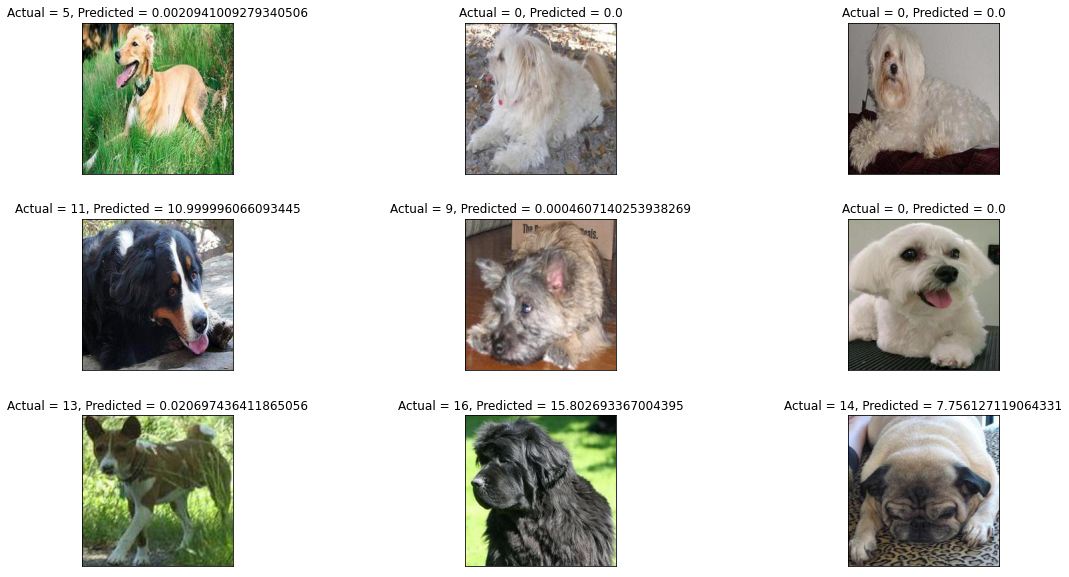

In [26]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, global_features_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(global_features_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(global_labels_test[r[0]] , global_labels_test[r[0]]*pred[r[0]][global_labels_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

Now Let's Try Transfer Learning

In [6]:
import keras
from keras.applications.vgg16 import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [7]:
from tensorflow.keras.utils import to_categorical
# extract train and val features
vgg_features_train = pretrained_model.predict(global_features_train)
vgg_features_val = pretrained_model.predict(global_features_test)

In [8]:
# OHE target column
train_target = to_categorical(global_labels_train)
val_target = to_categorical(global_labels_test)

In [10]:
import time
start = time.time()
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(20, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

# train model using features generated from VGG16 model
model2.fit(vgg_features_train, train_target, epochs=30, batch_size=128, validation_data=(vgg_features_val, val_target))
end = time.time()
duration_cnn_vgg16 = end-start
print(duration_cnn_vgg16)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2508900   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
Total params: 2,511,320
Trainable params: 2,511,120
Non-trainable params: 200
_________________________________________________________________
Epoch 1/50
27/27 [==============================] - 12s 31ms/step - loss: 2.9891 - accuracy: 0.1182 - val_loss

In [11]:
loss, accuracy = model2.evaluate(vgg_features_val, val_target)

print(loss,accuracy)

26/26 [==============================] - 0s 4ms/step - loss: 1.1395 - accuracy: 0.6703
1.1395087242126465 0.6703030467033386


In [17]:
pred2 = model2.predict(vgg_features_val)

pred2.shape

NameError: name 'model2' is not defined

In [16]:
# Get most likely class
predicted_classes = np.argmax(pred2, axis=1)

NameError: name 'pred2' is not defined

In [17]:
len(predicted_classes)

825

In [14]:
top20_mapping = pd.read_csv(f"{data_dir}/top20_label_mapping.csv")
top20_mapping

,label,name
0,0,n02085936-Maltese_dog
1,1,n02086240-Shih-Tzu
2,2,n02086910-papillon
3,3,n02088094-Afghan_hound
4,4,n02090721-Irish_wolfhound
5,5,n02091831-Saluki
6,6,n02092002-Scottish_deerhound
7,7,n02095889-Sealyham_terrier
8,8,n02096051-Airedale
9,9,n02096177-cairn


In [15]:
import sklearn.metrics as metrics
report = metrics.classification_report(global_labels_test, predicted_classes,target_names=top20_mapping.name)
print(report) 

NameError: name 'predicted_classes' is not defined

In [56]:
top20_mapping.name

0              n02085936-Maltese_dog
1                 n02086240-Shih-Tzu
2                 n02086910-papillon
3             n02088094-Afghan_hound
4          n02090721-Irish_wolfhound
5                   n02091831-Saluki
6       n02092002-Scottish_deerhound
7         n02095889-Sealyham_terrier
8                 n02096051-Airedale
9                    n02096177-cairn
10         n02097474-Tibetan_terrier
11    n02107683-Bernese_mountain_dog
12             n02108000-EntleBucher
13                 n02110806-basenji
14                     n02110958-pug
15                n02111129-Leonberg
16            n02111277-Newfoundland
17          n02111500-Great_Pyrenees
18                 n02111889-Samoyed
19              n02112018-Pomeranian
Name: name, dtype: object

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(global_labels_test, predicted_classes)

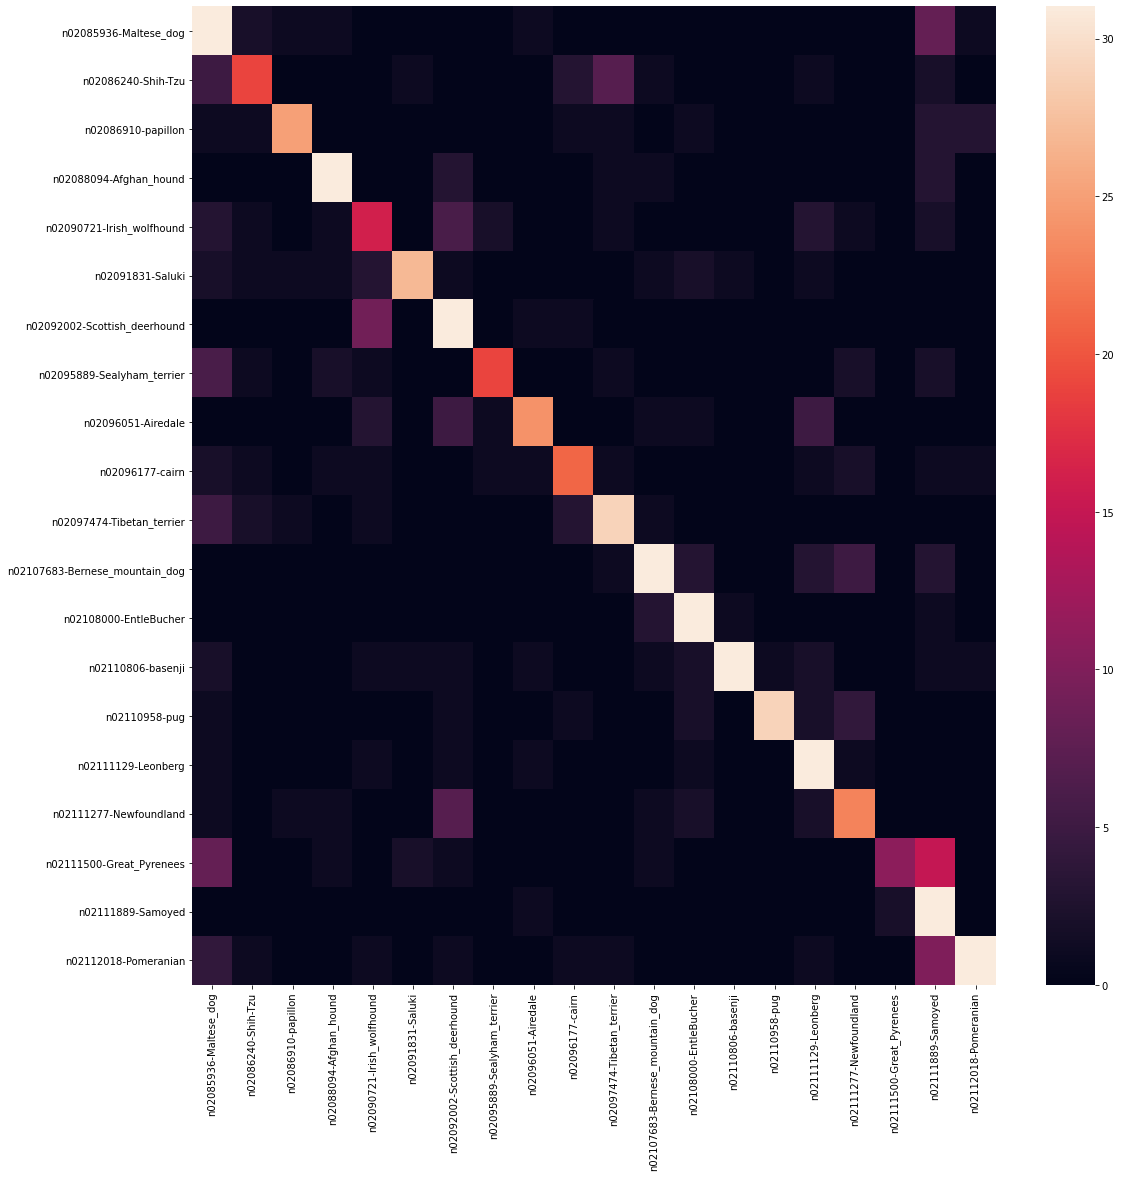

In [61]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(18, 18))
_ = sns.heatmap(cm, ax=ax, yticklabels=top20_mapping.name, xticklabels=top20_mapping.name, robust=True)

In [62]:
df = pd.DataFrame({'actual':global_labels_test,'pred':predicted_classes})
df['count']=1

In [64]:
df.head()

,actual,pred,count
0,0,0,1
1,0,0,1
2,0,0,1
3,0,8,1
4,0,0,1


In [68]:
final_df = pd.merge(pd.merge(df,top20_mapping,left_on='actual',right_on='label',how='left'),top20_mapping,left_on='pred',right_on='label',how='left',suffixes=['_actual','_pred'])
final_df.head()

,actual,pred,count,label_actual,name_actual,label_pred,name_pred
0,0,0,1,0,n02085936-Maltese_dog,0,n02085936-Maltese_dog
1,0,0,1,0,n02085936-Maltese_dog,0,n02085936-Maltese_dog
2,0,0,1,0,n02085936-Maltese_dog,0,n02085936-Maltese_dog
3,0,8,1,0,n02085936-Maltese_dog,8,n02096051-Airedale
4,0,0,1,0,n02085936-Maltese_dog,0,n02085936-Maltese_dog


In [72]:
df = final_df
misclass_df = df[df['name_actual'] != df['name_pred']].groupby(['name_actual', 'name_pred']).sum().sort_values(['count'], ascending=False).reset_index()
misclass_df['pair'] = misclass_df['name_actual'] + ' / ' + misclass_df['name_pred']
misclass_df = misclass_df[['pair', 'count']].take(range(30))
misclass_df


,pair,count
0,n02111500-Great_Pyrenees / n02111889-Samoyed,15
1,n02112018-Pomeranian / n02111889-Samoyed,10
2,n02092002-Scottish_deerhound / n02090721-Irish...,9
3,n02085936-Maltese_dog / n02111889-Samoyed,8
4,n02111500-Great_Pyrenees / n02085936-Maltese_dog,8
5,n02086240-Shih-Tzu / n02097474-Tibetan_terrier,7
6,n02111277-Newfoundland / n02092002-Scottish_de...,7
7,n02090721-Irish_wolfhound / n02092002-Scottish...,6
8,n02095889-Sealyham_terrier / n02085936-Maltese...,6
9,n02086240-Shih-Tzu / n02085936-Maltese_dog,5


<AxesSubplot:ylabel='pair'>

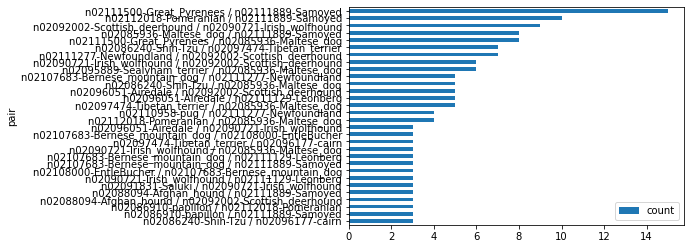

In [79]:
misclass_df.sort_values(by='count').plot(x='pair',kind='barh')

Plot the misclassified images

In [86]:
final_df[(final_df.name_actual=="n02111500-Great_Pyrenees") & (final_df.name_pred =="n02111889-Samoyed")]

,actual,pred,count,label_actual,name_actual,label_pred,name_pred
695,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed
700,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed
702,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed
703,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed
704,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed
705,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed
707,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed
708,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed
709,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed
710,17,18,1,17,n02111500-Great_Pyrenees,18,n02111889-Samoyed


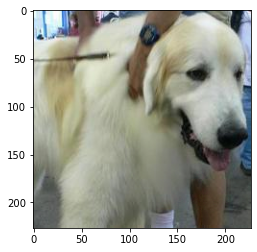

In [113]:
plt.imshow(global_features_test[700])

In [111]:
pred695_df = pd.DataFrame({'preds':pred2[695]})
pred695_df=pd.merge(pred695_df,top20_mapping,left_on=pred695_df.index,right_on='label',how='left')
pred695_df.sort_values(by='preds',ascending=0)

,preds,label,name
18,0.472553,18,n02111889-Samoyed
0,0.180588,0,n02085936-Maltese_dog
4,0.149164,4,n02090721-Irish_wolfhound
17,0.099751,17,n02111500-Great_Pyrenees
13,0.017283,13,n02110806-basenji
5,0.013229,5,n02091831-Saluki
9,0.012098,9,n02096177-cairn
7,0.011310,7,n02095889-Sealyham_terrier
16,0.007118,16,n02111277-Newfoundland
2,0.007082,2,n02086910-papillon


In [112]:
pred695_df = pd.DataFrame({'preds':pred2[700]})ß
pred695_df=pd.merge(pred695_df,top20_mapping,left_on=pred695_df.index,right_on='label',how='left')
pred695_df.sort_values(by='preds',ascending=0)

,preds,label,name
18,0.378324,18,n02111889-Samoyed
7,0.244198,7,n02095889-Sealyham_terrier
15,0.117835,15,n02111129-Leonberg
11,0.078903,11,n02107683-Bernese_mountain_dog
0,0.071088,0,n02085936-Maltese_dog
17,0.035575,17,n02111500-Great_Pyrenees
16,0.022902,16,n02111277-Newfoundland
3,0.009979,3,n02088094-Afghan_hound
12,0.009133,12,n02108000-EntleBucher
2,0.008215,2,n02086910-papillon


In [115]:
model2.save('output/keras_cnn_basic_top20/vgg16')

INFO:tensorflow:Assets written to: output/keras_cnn_basic_top20/vgg16/assets


In [9]:
model2_chk = keras.models.load_model('output/keras_cnn_basic_top20/vgg16')

In [10]:
preds2_chk = model2_chk.predict(vgg_features_val)

In [11]:
preds2_chk.shape

(825, 20)

In [18]:
import pandas as pd
pred695_df = pd.DataFrame({'preds':preds2_chk[700]})
pred695_df=pd.merge(pred695_df,top20_mapping,left_on=pred695_df.index,right_on='label',how='left')
pred695_df.sort_values(by='preds',ascending=0)

,preds,label,name
18,0.378324,18,n02111889-Samoyed
7,0.244198,7,n02095889-Sealyham_terrier
15,0.117835,15,n02111129-Leonberg
11,0.078903,11,n02107683-Bernese_mountain_dog
0,0.071088,0,n02085936-Maltese_dog
17,0.035575,17,n02111500-Great_Pyrenees
16,0.022902,16,n02111277-Newfoundland
3,0.009979,3,n02088094-Afghan_hound
12,0.009133,12,n02108000-EntleBucher
2,0.008215,2,n02086910-papillon


In [20]:
# Get most likely class
predicted_classes = np.argmax(preds2_chk, axis=1)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(global_labels_test, predicted_classes)

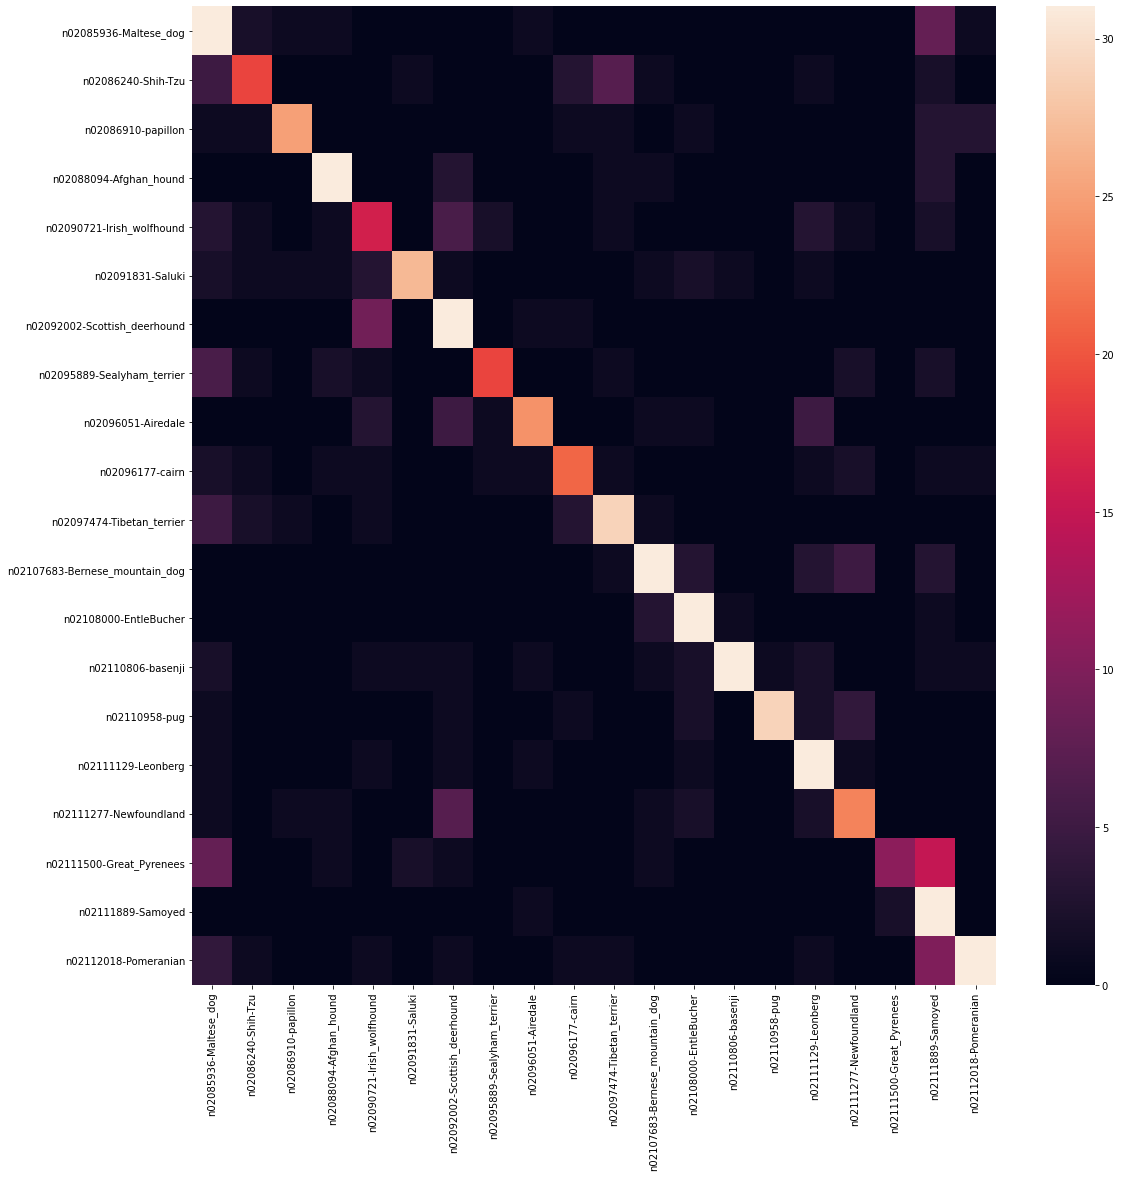

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(18, 18))
_ = sns.heatmap(cm, ax=ax, yticklabels=top20_mapping.name, xticklabels=top20_mapping.name, robust=True)

<AxesSubplot:ylabel='pair'>

<Figure size 720x720 with 0 Axes>

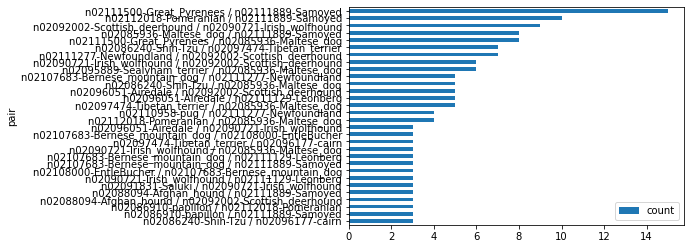

In [25]:
df = pd.DataFrame({'actual':global_labels_test,'pred':predicted_classes})
df['count']=1

final_df = pd.merge(pd.merge(df,top20_mapping,left_on='actual',right_on='label',how='left'),top20_mapping,left_on='pred',right_on='label',how='left',suffixes=['_actual','_pred'])
final_df.head()

df = final_df
misclass_df = df[df['name_actual'] != df['name_pred']].groupby(['name_actual', 'name_pred']).sum().sort_values(['count'], ascending=False).reset_index()
misclass_df['pair'] = misclass_df['name_actual'] + ' / ' + misclass_df['name_pred']
misclass_df = misclass_df[['pair', 'count']].take(range(30))
misclass_df


plt.figure(figsize=(10,10))
misclass_df.sort_values(by='count').plot(x='pair',kind='barh')

In [28]:
misclass_df.to_csv('misclass.csv',index=False)

In [32]:
pyr_as_semo_df = final_df[(final_df.name_actual=="n02111500-Great_Pyrenees") & (final_df.name_pred =="n02111889-Samoyed")]
pyr_as_semo_indexes = pyr_as_semo_df.index
pyr_as_semo_indexes

Int64Index([695, 700, 702, 703, 704, 705, 707, 708, 709, 710, 719, 728, 730,
            731, 733],
           dtype='int64')

Plot all of these images in 1 plot

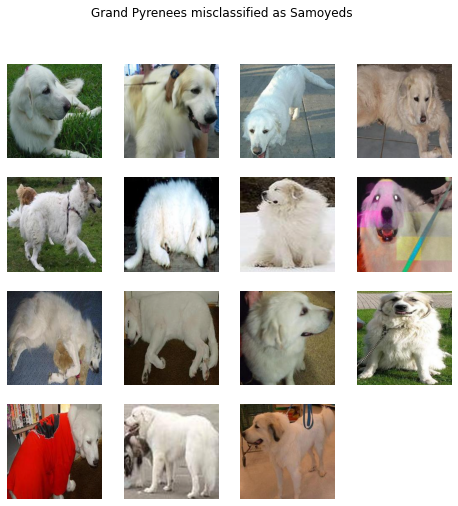

In [43]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1, columns*rows+1):
    try:
        img_index = pyr_as_semo_indexes[i-1]
        img = global_features_test[img_index]
    except IndexError:
        img = np.zeros([100,100,3],dtype=np.uint8)
        img.fill(255) # or img[:] = 255


    ax = fig.add_subplot(rows, columns, i)
    ax.axis('off')
    plt.imshow(img)
plt.suptitle('Grand Pyrenees misclassified as Samoyeds')
plt.axis('off')
plt.show()

In [66]:
import pandas as pd
pred695_df = pd.DataFrame({'preds':preds2_chk[695]})
pred695_df=pd.merge(pred695_df,top20_mapping,left_on=pred695_df.index,right_on='label',how='left')
pred695_df.sort_values(by='preds',ascending=0)

,preds,label,name
18,0.472553,18,n02111889-Samoyed
0,0.180588,0,n02085936-Maltese_dog
4,0.149164,4,n02090721-Irish_wolfhound
17,0.099751,17,n02111500-Great_Pyrenees
13,0.017283,13,n02110806-basenji
5,0.013229,5,n02091831-Saluki
9,0.012098,9,n02096177-cairn
7,0.011310,7,n02095889-Sealyham_terrier
16,0.007118,16,n02111277-Newfoundland
2,0.007082,2,n02086910-papillon


In [67]:
pred695_df.to_csv('pred695.csv',index=False)

In [46]:
pom_as_semo_df = final_df[(final_df.name_actual=="n02112018-Pomeranian") & (final_df.name_pred =="n02111889-Samoyed")]
pom_as_semo_indexes = pom_as_semo_df.index
pom_as_semo_indexes

Int64Index([773, 778, 787, 794, 809, 811, 813, 815, 820, 824], dtype='int64')

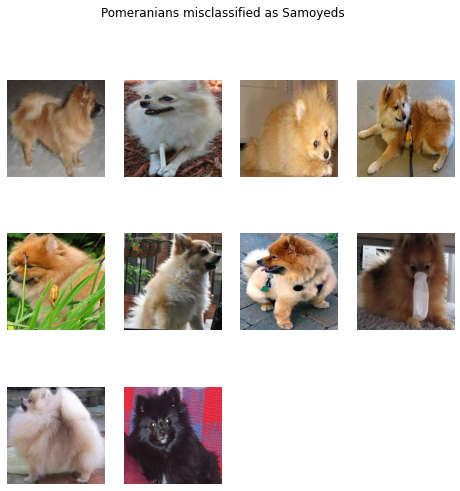

In [47]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 3
for i in range(1, columns*rows+1):
    try:
        img_index = pom_as_semo_indexes[i-1]
        img = global_features_test[img_index]
    except IndexError:
        img = np.zeros([100,100,3],dtype=np.uint8)
        img.fill(255) # or img[:] = 255


    ax = fig.add_subplot(rows, columns, i)
    ax.axis('off')
    plt.imshow(img)
plt.suptitle('Pomeranians misclassified as Samoyeds')
plt.axis('off')
plt.show()

In [48]:
#n02092002-Scottish_deerhound / n02090721-Irish_wolfhound
scott_as_irish_df = final_df[(final_df.name_actual=="n02092002-Scottish_deerhound") & (final_df.name_pred =="n02090721-Irish_wolfhound")]
scott_as_irish_indexes = scott_as_irish_df.index
scott_as_irish_indexes

Int64Index([249, 251, 253, 256, 271, 275, 282, 284, 286], dtype='int64')

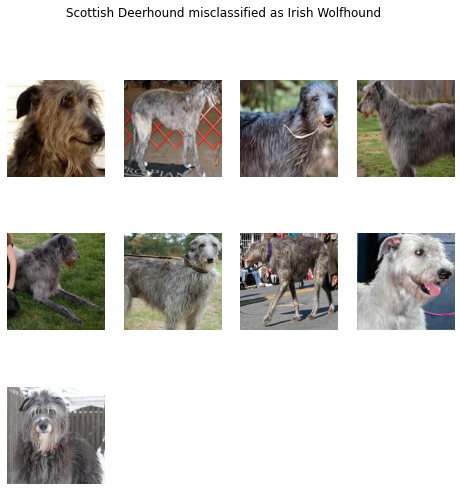

In [49]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 3
for i in range(1, columns*rows+1):
    try:
        img_index = scott_as_irish_indexes[i-1]
        img = global_features_test[img_index]
    except IndexError:
        img = np.zeros([100,100,3],dtype=np.uint8)
        img.fill(255) # or img[:] = 255


    ax = fig.add_subplot(rows, columns, i)
    ax.axis('off')
    plt.imshow(img)
plt.suptitle('Scottish Deerhound misclassified as Irish Wolfhound')
plt.axis('off')
plt.show()

In [50]:
final_df.head()

,actual,pred,count,label_actual,name_actual,label_pred,name_pred
0,0,0,1,0,n02085936-Maltese_dog,0,n02085936-Maltese_dog
1,0,0,1,0,n02085936-Maltese_dog,0,n02085936-Maltese_dog
2,0,0,1,0,n02085936-Maltese_dog,0,n02085936-Maltese_dog
3,0,8,1,0,n02085936-Maltese_dog,8,n02096051-Airedale
4,0,0,1,0,n02085936-Maltese_dog,0,n02085936-Maltese_dog


Representative images for breed are those that are the breed and correctly classified as the breed

In [51]:
final_df.name_actual.value_counts()

n02085936-Maltese_dog             55
n02112018-Pomeranian              54
n02110806-basenji                 49
n02107683-Bernese_mountain_dog    49
n02092002-Scottish_deerhound      43
n02097474-Tibetan_terrier         42
n02111129-Leonberg                41
n02091831-Saluki                  41
n02096051-Airedale                40
n02110958-pug                     40
n02111500-Great_Pyrenees          39
n02088094-Afghan_hound            39
n02086240-Shih-Tzu                39
n02108000-EntleBucher             39
n02111277-Newfoundland            38
n02111889-Samoyed                 37
n02086910-papillon                36
n02090721-Irish_wolfhound         36
n02095889-Sealyham_terrier        34
n02096177-cairn                   34
Name: name_actual, dtype: int64

In [53]:
basenji_df = final_df.query('name_actual==\'n02110806-basenji\' and name_pred==\'n02110806-basenji\'')
basenji_df.head()

,actual,pred,count,label_actual,name_actual,label_pred,name_pred
527,13,13,1,13,n02110806-basenji,13,n02110806-basenji
528,13,13,1,13,n02110806-basenji,13,n02110806-basenji
529,13,13,1,13,n02110806-basenji,13,n02110806-basenji
530,13,13,1,13,n02110806-basenji,13,n02110806-basenji
531,13,13,1,13,n02110806-basenji,13,n02110806-basenji


In [56]:
basenji_df.sample(n=6,random_state=123)

,actual,pred,count,label_actual,name_actual,label_pred,name_pred
535,13,13,1,13,n02110806-basenji,13,n02110806-basenji
571,13,13,1,13,n02110806-basenji,13,n02110806-basenji
534,13,13,1,13,n02110806-basenji,13,n02110806-basenji
543,13,13,1,13,n02110806-basenji,13,n02110806-basenji
562,13,13,1,13,n02110806-basenji,13,n02110806-basenji
537,13,13,1,13,n02110806-basenji,13,n02110806-basenji


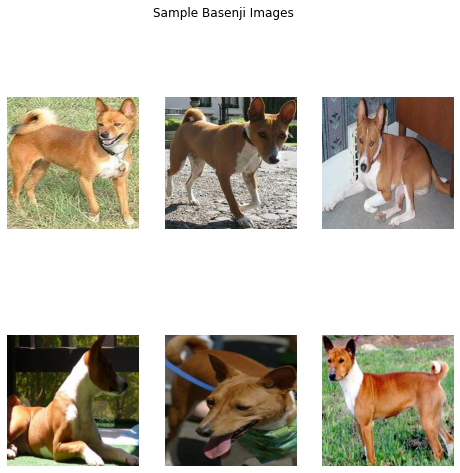

In [57]:
#Sample Basenji Images
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 2
basenji_indexes = basenji_df.sample(n=6,random_state=123).index

for i in range(1, columns*rows+1):
    try:
        img_index = basenji_indexes[i-1]
        img = global_features_test[img_index]
    except IndexError:
        img = np.zeros([100,100,3],dtype=np.uint8)
        img.fill(255) # or img[:] = 255


    ax = fig.add_subplot(rows, columns, i)
    ax.axis('off')
    plt.imshow(img)
plt.suptitle('Sample Basenji Images')
plt.axis('off')
plt.show()

In [58]:
pug_df = final_df.query('name_actual==\'n02110958-pug\' and name_pred==\'n02110958-pug\'')
pug_df.head()

,actual,pred,count,label_actual,name_actual,label_pred,name_pred
576,14,14,1,14,n02110958-pug,14,n02110958-pug
578,14,14,1,14,n02110958-pug,14,n02110958-pug
579,14,14,1,14,n02110958-pug,14,n02110958-pug
580,14,14,1,14,n02110958-pug,14,n02110958-pug
581,14,14,1,14,n02110958-pug,14,n02110958-pug


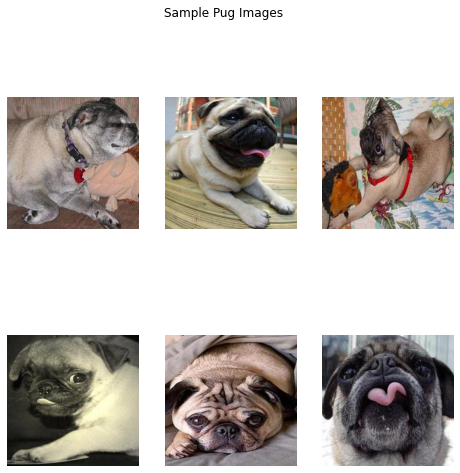

In [59]:
#Sample Basenji Images
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 2
basenji_indexes = pug_df.sample(n=6,random_state=123).index

for i in range(1, columns*rows+1):
    try:
        img_index = basenji_indexes[i-1]
        img = global_features_test[img_index]
    except IndexError:
        img = np.zeros([100,100,3],dtype=np.uint8)
        img.fill(255) # or img[:] = 255


    ax = fig.add_subplot(rows, columns, i)
    ax.axis('off')
    plt.imshow(img)
plt.suptitle('Sample Pug Images')
plt.axis('off')
plt.show()

In [60]:
samoyed_df = final_df.query('name_actual==\'n02111889-Samoyed\' and name_pred==\'n02111889-Samoyed\'')
samoyed_df.head()

,actual,pred,count,label_actual,name_actual,label_pred,name_pred
734,18,18,1,18,n02111889-Samoyed,18,n02111889-Samoyed
735,18,18,1,18,n02111889-Samoyed,18,n02111889-Samoyed
736,18,18,1,18,n02111889-Samoyed,18,n02111889-Samoyed
737,18,18,1,18,n02111889-Samoyed,18,n02111889-Samoyed
738,18,18,1,18,n02111889-Samoyed,18,n02111889-Samoyed


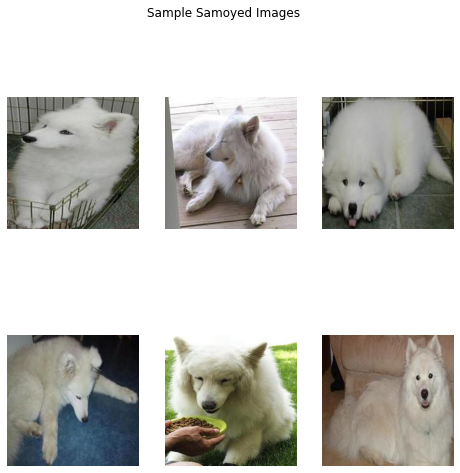

In [62]:
#Sample Basenji Images
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 2
samoyed_indexes = samoyed_df.sample(n=6,random_state=123).index

for i in range(1, columns*rows+1):
    try:
        img_index = samoyed_indexes[i-1]
        img = global_features_test[img_index]
    except IndexError:
        img = np.zeros([100,100,3],dtype=np.uint8)
        img.fill(255) # or img[:] = 255


    ax = fig.add_subplot(rows, columns, i)
    ax.axis('off')
    plt.imshow(img)
plt.suptitle('Sample Samoyed Images')
plt.axis('off')
plt.show()

In [63]:
breed_folder = 'n02090721-Irish_wolfhound'
irish_df = final_df.query(f'name_actual==\'{breed_folder}\' and name_pred==\'{breed_folder}\'')
irish_df.head()

,actual,pred,count,label_actual,name_actual,label_pred,name_pred
170,4,4,1,4,n02090721-Irish_wolfhound,4,n02090721-Irish_wolfhound
171,4,4,1,4,n02090721-Irish_wolfhound,4,n02090721-Irish_wolfhound
173,4,4,1,4,n02090721-Irish_wolfhound,4,n02090721-Irish_wolfhound
176,4,4,1,4,n02090721-Irish_wolfhound,4,n02090721-Irish_wolfhound
177,4,4,1,4,n02090721-Irish_wolfhound,4,n02090721-Irish_wolfhound


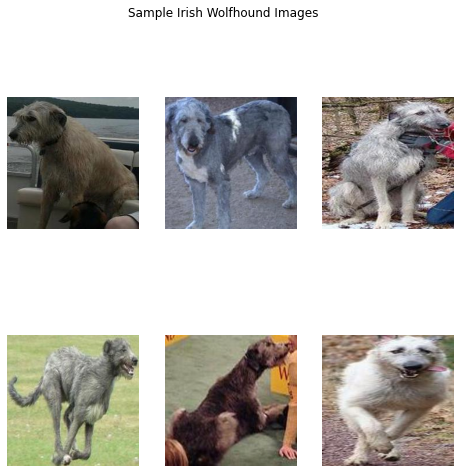

In [65]:
#Sample Irish Wolfhound Images
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 2
breed_indexes = irish_df.sample(n=6,random_state=123).index

for i in range(1, columns*rows+1):
    try:
        img_index = breed_indexes[i-1]
        img = global_features_test[img_index]
    except IndexError:
        img = np.zeros([100,100,3],dtype=np.uint8)
        img.fill(255) # or img[:] = 255


    ax = fig.add_subplot(rows, columns, i)
    ax.axis('off')
    plt.imshow(img)
plt.suptitle('Sample Irish Wolfhound Images')
plt.axis('off')
plt.show()